# TABLE OF CONTENTS:

    1. Introduction to dataset
    
    2. Import libraries
    
    3. Read dataset
    
    4. Data exploration
    
    5. Segregation of particular values
    
    6. Data Visualisation
    
    7. Analyse data based on certain criterias
    
    8. profiling based on topness
    
    9. Data analysis

# INTRODUCTION TO DATASET:

Context:  The war between Marvel and DC is old, but what does the numbers say? Check here with data from about the movies from 2000 to 2021

Content:  41 movies from dc and marvel and infos from imdb about them, like rate, budget etc

Acknowledgements:  Data all from imdb

# IMPORT LIBRARIES AND DATASET:

In [1]:
import csv
from termcolor import colored
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
db=pd.read_csv('/Users/admin/Desktop/Folder/ML Training/MarvelvsDC_db.csv')

# READ DATASET:

In [2]:
db.head(10)

,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening_Weekend_USA,Gross_USA,Gross_Worldwide,T/F
0,Iron Man,Marvel,7.9,79,126,2008,140000000.0,98618668,318604126,585366247,False
1,The Incredible Hulk,Marvel,6.7,61,112,2008,150000000.0,55414050,134806913,263427551,True
2,Iron Man 2,Marvel,7.0,57,124,2010,200000000.0,128122480,312433331,623933331,True
3,Thor,Marvel,7.0,57,115,2011,150000000.0,65723338,181030624,449326618,True
4,Captain America: The First Avenger,Marvel,6.9,66,124,2011,140000000.0,65058524,176654505,370569774,True
5,The Avengers,Marvel,8.0,69,143,2012,220000000.0,207438708,623357910,1518812988,False
6,Iron Man Three,Marvel,7.2,62,130,2013,200000000.0,174144585,409013994,1214811252,False
7,Thor: The Dark World,Marvel,6.9,54,112,2013,170000000.0,85737841,206362140,644783140,True
8,Captain America: The Winter Soldier,Marvel,7.7,70,136,2014,170000000.0,95023721,259766572,714421503,False
9,Guardians of the Galaxy,Marvel,8.0,76,121,2014,170000000.0,94320883,333176600,772776600,False


In [3]:
text1 = colored('The shape of the dataframe : ', 'red', attrs=['underline'])
print(text1)
print(db.shape)

The shape of the dataframe : 
(41, 11)


In [4]:
text2 = colored('The value count of Rate : ', 'red', attrs=['underline'])
print(text2)
print(db.value_counts('Rate'))

The value count of Rate : 
Rate
6.9    3
7.0    3
7.1    3
7.3    3
7.6    3
7.4    2
8.5    2
6.0    2
8.0    2
7.9    2
7.7    1
8.7    1
8.4    1
8.3    1
8.2    1
7.8    1
3.3    1
7.5    1
4.7    1
7.2    1
6.7    1
6.5    1
6.4    1
5.5    1
5.4    1
9.0    1
dtype: int64


In [5]:
text3 = colored('The mean w.r.t Run-Time : ', 'red', attrs=['underline'])
print(text3)
print(db.groupby('Minutes').mean())

The mean w.r.t Run-Time : 
             Rate  Metascore      Release        Budget  Opening_Weekend_USA  \
Minutes                                                                        
81       4.700000  33.000000  2010.000000  4.700000e+07            5379365.0   
104      3.300000  27.000000  2004.000000  1.000000e+08           16728411.0   
112      6.800000  57.500000  2010.500000  1.600000e+08           70575945.5   
114      5.500000  39.000000  2011.000000  2.000000e+08           53174303.0   
115      7.250000  64.500000  2013.500000  1.575000e+08           75390824.5   
117      7.300000  64.000000  2015.000000  1.300000e+08           57225526.0   
118      7.100000  70.000000  2018.000000  1.620000e+08           75812205.0   
120      6.400000  45.000000  2017.000000  3.000000e+08           93842239.0   
121      8.000000  76.000000  2014.000000  1.700000e+08           94320883.0   
122      8.700000  59.000000  2019.000000  5.500000e+07           96202337.0   
123      6.45

In [6]:
text4 = colored('Mean  : ', 'red', attrs=['underline'])
print(text4)
db.mean()

Mean  : 


Rate                   7.185366e+00
Metascore              6.375610e+01
Minutes                1.327073e+02
Release                2.014122e+03
Budget                 1.841026e+08
Opening_Weekend_USA    1.302610e+08
Gross_USA              3.282632e+08
Gross_Worldwide        8.348293e+08
T/F                    4.390244e-01
dtype: float64

In [7]:
text5 = colored('Standard deviation : ', 'red', attrs=['underline'])
print(text5)
db.std()

Standard deviation : 


Rate                   1.099218e+00
Metascore              1.357163e+01
Minutes                1.838647e+01
Release                4.428290e+00
Budget                 6.441020e+07
Opening_Weekend_USA    1.274610e+08
Gross_USA              1.967245e+08
Gross_Worldwide        5.590835e+08
T/F                    5.024331e-01
dtype: float64

In [8]:
text6 = colored('Database description : ', 'red', attrs=['underline'])
print(text6)
db.describe()

Database description : 


,Rate,Metascore,Minutes,Release,Budget,Opening_Weekend_USA,Gross_USA,Gross_Worldwide
count,41.000000,41.000000,41.000000,41.000000,3.900000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,7.185366,63.756098,132.707317,2014.121951,1.841026e+08,1.302610e+08,3.282632e+08,8.348293e+08
std,1.099218,13.571626,18.386468,4.428290,6.441020e+07,1.274610e+08,1.967245e+08,5.590835e+08
min,3.300000,27.000000,81.000000,2004.000000,4.700000e+07,5.379365e+06,1.054712e+07,1.090331e+07
25%,6.900000,57.000000,121.000000,2011.000000,1.500000e+08,6.505852e+07,2.000812e+08,4.493266e+08
50%,7.300000,67.000000,132.000000,2015.000000,1.750000e+08,9.620234e+07,3.186041e+08,7.468469e+08
75%,7.900000,72.000000,143.000000,2018.000000,2.100000e+08,1.584115e+08,4.090140e+08,1.128275e+09
max,9.000000,88.000000,181.000000,2021.000000,3.560000e+08,8.046178e+08,8.583730e+08,2.797801e+09


In [9]:
text7 = colored('Standard deviation : ', 'red', attrs=['underline'])
print(text7)
print(db.value_counts('Release'))

Standard deviation : 
Release
2017    5
2019    5
2018    4
2016    4
2013    3
2008    3
2011    3
2010    2
2012    2
2014    2
2015    2
2020    1
2004    1
2005    1
2009    1
2006    1
2021    1
dtype: int64


In [10]:
text8 = colored('The minimum values : ', 'red', attrs=['underline'])
print(text8)
db.min()

The minimum values : 


Original Title            Ant-Man
Company                        DC
Rate                          3.3
Metascore                      27
Minutes                        81
Release                      2004
Budget                 47000000.0
Opening_Weekend_USA       5379365
Gross_USA                10547117
Gross_Worldwide          10903312
T/F                         False
dtype: object

In [11]:
text9 = colored('The maximum values : ', 'red', attrs=['underline'])
print(text9)
db.max()

The maximum values : 


Original Title         Wonder Woman 1984
Company                           Marvel
Rate                                 9.0
Metascore                             88
Minutes                              181
Release                             2021
Budget                       356000000.0
Opening_Weekend_USA            804617772
Gross_USA                      858373000
Gross_Worldwide               2797800564
T/F                                 True
dtype: object

In [12]:
avg=db.Rate.mean()
print('The mean value of Ratings : ',avg)
print('The maximum value of Metascore : ',db.Metascore.max())

The mean value of Ratings :  7.185365853658536
The maximum value of Metascore :  88


In [13]:
text10 = colored('The count null values : ', 'red', attrs=['underline'])
print(text10)
db.isnull().sum()

The count null values : 


Original Title         0
Company                0
Rate                   0
Metascore              0
Minutes                0
Release                0
Budget                 2
Opening_Weekend_USA    0
Gross_USA              0
Gross_Worldwide        0
T/F                    0
dtype: int64

In [14]:
#filling null values
db.fillna(db.median(),inplace=True)

In [15]:
#after replacing, The count of null values
db.isnull().sum()

Original Title         0
Company                0
Rate                   0
Metascore              0
Minutes                0
Release                0
Budget                 0
Opening_Weekend_USA    0
Gross_USA              0
Gross_Worldwide        0
T/F                    0
dtype: int64

# Data Visualisation

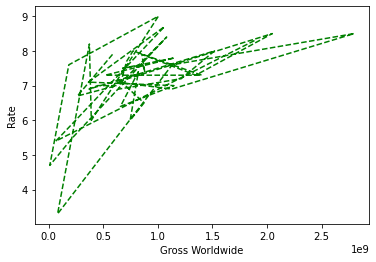

In [16]:
import matplotlib.pyplot as plt
x=db.Gross_Worldwide
y=db.Rate
plt.plot(x,y,'g--')
plt.xlabel('Gross Worldwide')
plt.ylabel('Rate')
plt.show()

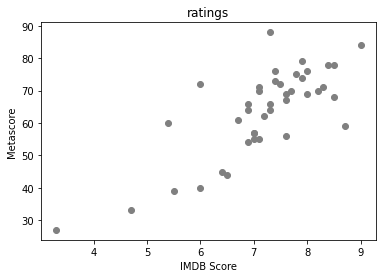

In [17]:
import matplotlib.pyplot as plt
x=db.Rate
y=db.Metascore
plt.scatter(x,y,c='grey',marker='o')
plt.xlabel('IMDB Score')
plt.ylabel('Metascore')
plt.title('ratings')
plt.show()

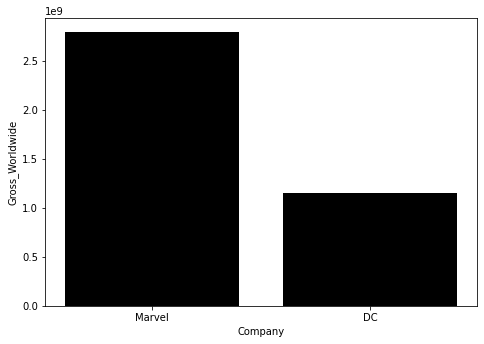

In [18]:
import matplotlib.pyplot as plt
x=db.Gross_Worldwide
y=db.Company
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(y,x,color='black')
plt.ylabel('Gross_Worldwide')
plt.xlabel('Company')
plt.show()

In [19]:
sns.set_theme()

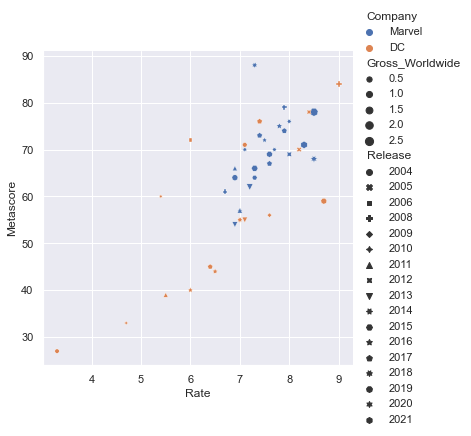

In [20]:
sns.relplot(data=db,x='Rate',y='Metascore',hue='Company',size='Gross_Worldwide',style='Release')

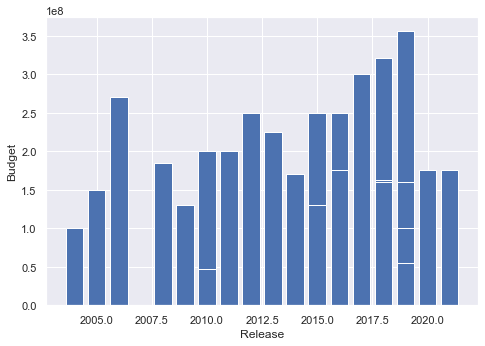

In [21]:
import matplotlib.pyplot as plt
x=db.Budget
y=db.Release
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(y,x)
plt.ylabel('Budget')
plt.xlabel('Release')
plt.show()

<AxesSubplot:xlabel='Budget', ylabel='Count'>

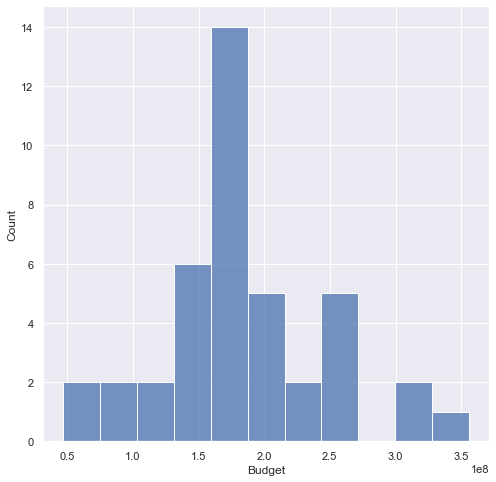

In [22]:
fig,ax=plt.subplots(figsize=(8,8))
sns.histplot(db.Budget)

<AxesSubplot:xlabel='Budget', ylabel='Density'>

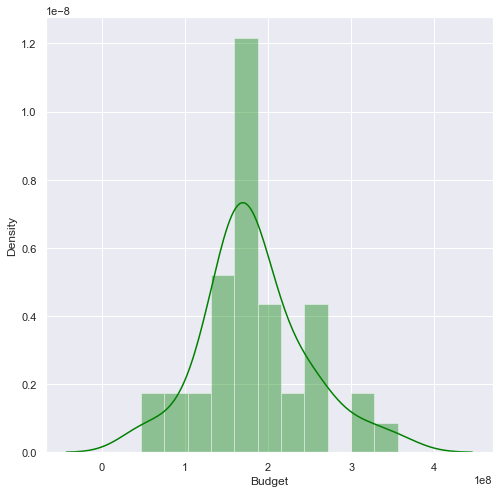

In [23]:
fig,ax=plt.subplots(figsize=(8,8))
sns.distplot(db.Budget,color='green')

<AxesSubplot:>

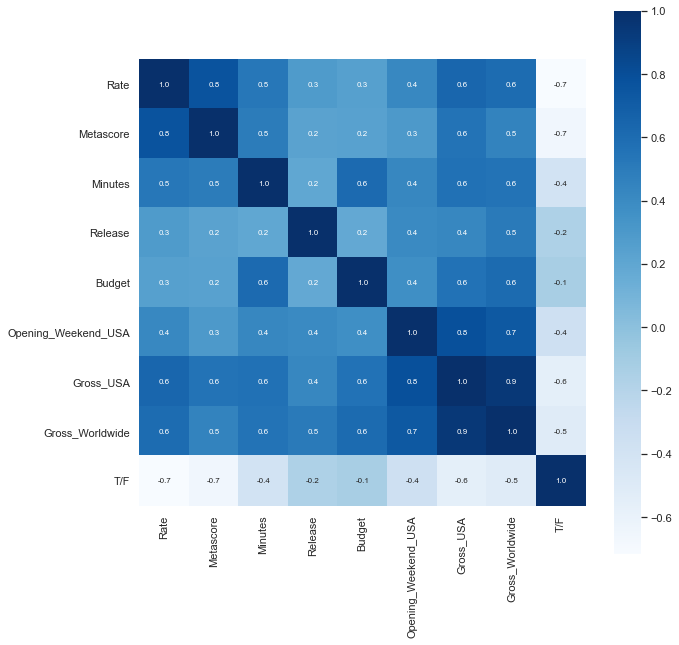

In [24]:
correlation=db.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True, fmt='.1f',annot=True,annot_kws={'size':8}, cmap='Blues')

# Preprocessing Data

TRAINING AND TESTING THE DATA:

In [25]:
X = db[['Rate', 'Metascore']]
y = db['T/F']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)
norm = MinMaxScaler().fit(X_train)

STANDARDIZING THE DATA:

In [26]:
scaler=StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True,with_mean=True,with_std=True)
X_train_standardized=scaler.transform(X_train)
X_test_standardized=scaler.transform(X_test)

CLASSIFING THE DATA USING Support Vector Machine Algorithm:

In [27]:
classifier=svm.SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [28]:
x_train_pred=classifier.predict(X_train)
TrDaccuracy=accuracy_score(x_train_pred,y_train)
x_test_pred=classifier.predict(X_test)
TeDaccuracy=accuracy_score(x_test_pred,y_test)

CALCULATING THE ACCURACY OF THE DATA:

In [29]:
print("Accuracy of the trained data is ",TrDaccuracy)

Accuracy of the trained data is  0.90625


In [30]:
print("Accuracy of the tested data is ",TeDaccuracy)

Accuracy of the tested data is  0.8888888888888888


In [31]:
input_data=( 7, 7.2) 
input_data_as_ndarray=np.asarray(input_data)
input_data_reshaped=input_data_as_ndarray.reshape(1,-1)

In [32]:
std_data=scaler.transform(input_data_reshaped)
print(std_data)

[[-0.11578457 -4.30279536]]


In [33]:
prediction=classifier.predict(std_data)
if(prediction[0]==True):
    print("The Marvel movies yield more profit!")
else:
    print("The DC movies yield more profit!")

The Marvel movies yield more profit!
